# Experiment 3 - Test the linear structure using aleatory generated networks

In [22]:
# external imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the database
df = pd.read_csv("exp3_aleatory.csv")
df.keys()

Index(['Unnamed: 0', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields'],
      dtype='object')

In [23]:
df.head(10)

,Unnamed: 0,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_time_find_attractors,n_time_find_pairs,n_time_find_fields,n_local_attractors,n_pair_attractors,n_attractor_fields
0,0,1,3,5,4,2,2,0.086390,0.000024,0.000045,17,16,13
1,1,2,3,5,4,2,2,0.091215,0.000025,0.000642,22,60,72
2,2,3,3,5,4,2,2,0.064815,0.000025,0.000039,11,12,9
3,3,4,3,5,4,2,2,0.100750,0.000026,0.000168,22,42,36
4,4,5,3,5,4,2,2,0.064546,0.000026,0.000069,14,18,16
5,5,6,3,5,4,2,2,0.086827,0.000024,0.000050,16,16,16
6,6,7,3,5,4,2,2,0.095516,0.000026,0.000297,20,37,46
7,7,8,3,5,4,2,2,0.049718,0.000026,0.000021,6,4,2
8,8,9,3,5,4,2,2,0.073481,0.000025,0.000073,13,18,11
9,9,10,3,5,4,2,2,0.086772,0.000024,0.000133,17,26,21


In [24]:
# Resume
print("Experiment Structural - Ring - Aleatory")
print("Number of samples:", df["i_sample"].max())
print("Range of local networks:", df["n_local_networks"].min(), " - ", df["n_local_networks"].max())

Experiment Structural - Ring - Aleatory
Number of samples: 100
Range of local networks: 3  -  9


<BarContainer object of 700 artists>

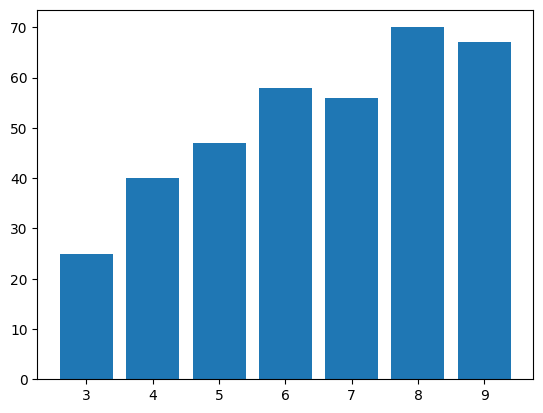

In [25]:
# Crea un gráfico de línea
plt.bar(df["n_local_networks"], df["n_local_attractors"])

<BarContainer object of 700 artists>

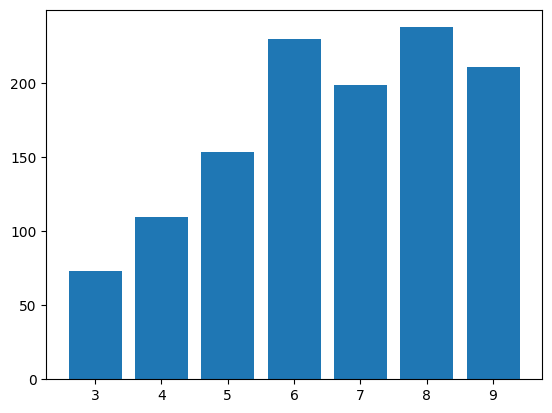

In [26]:
plt.bar(df["n_local_networks"], df["n_pair_attractors"])

<BarContainer object of 700 artists>

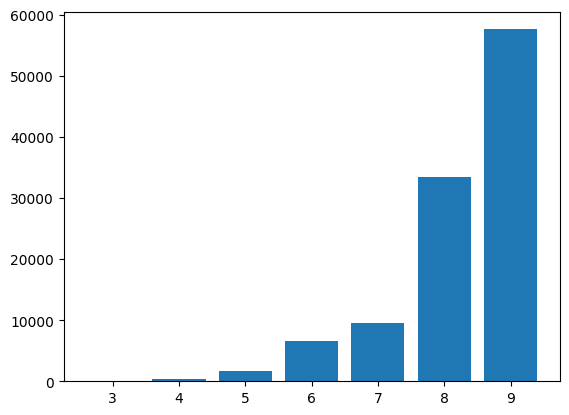

In [27]:
plt.bar(df["n_local_networks"], df["n_attractor_fields"])

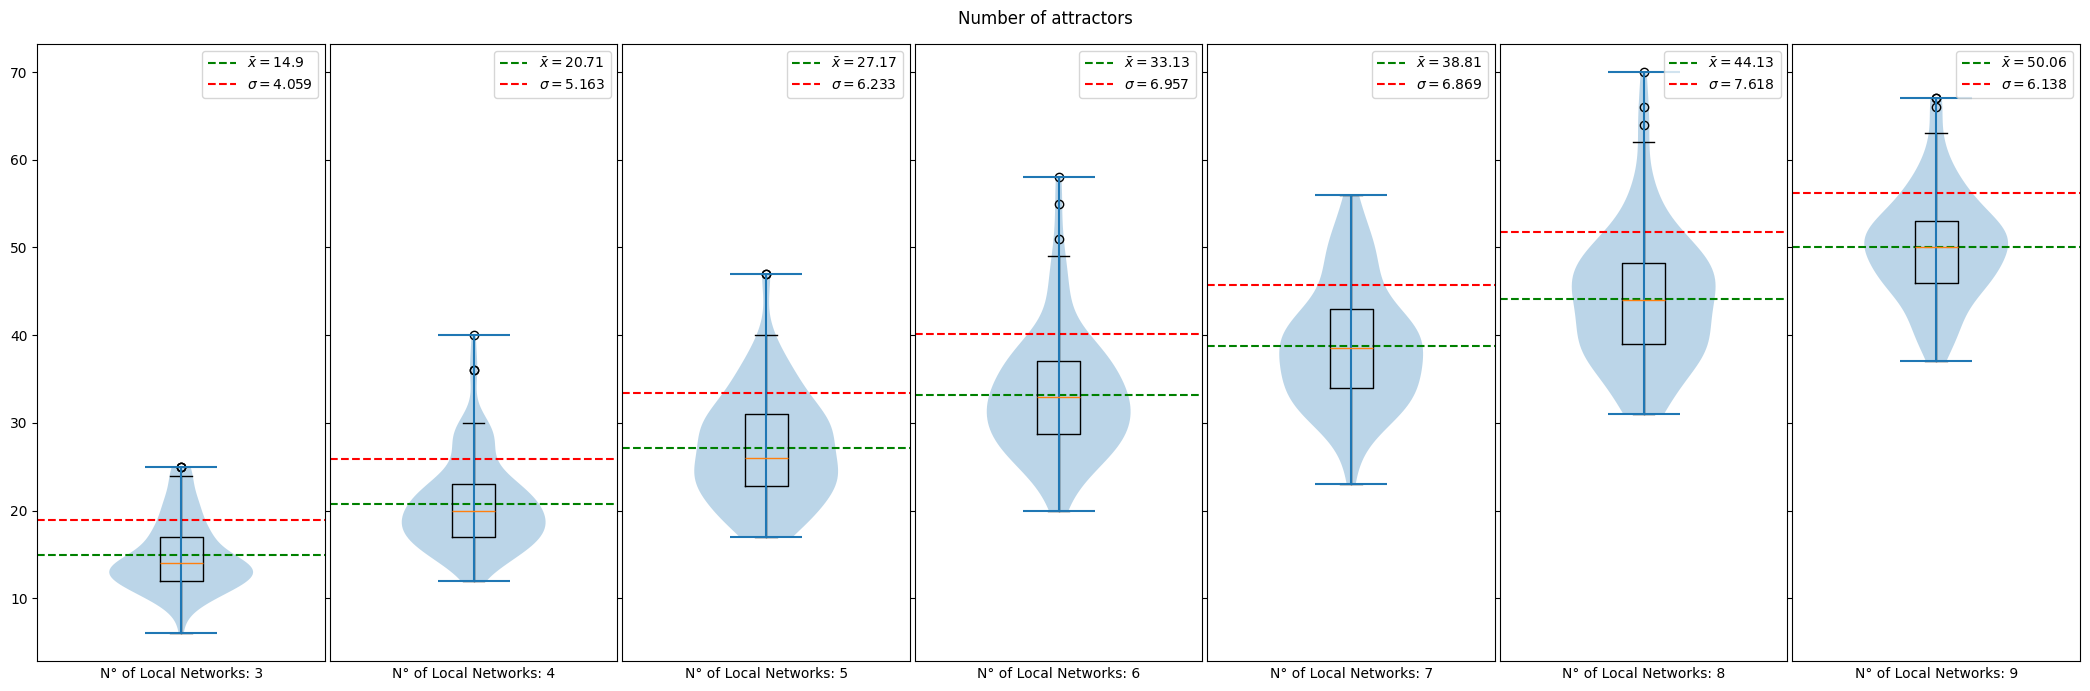

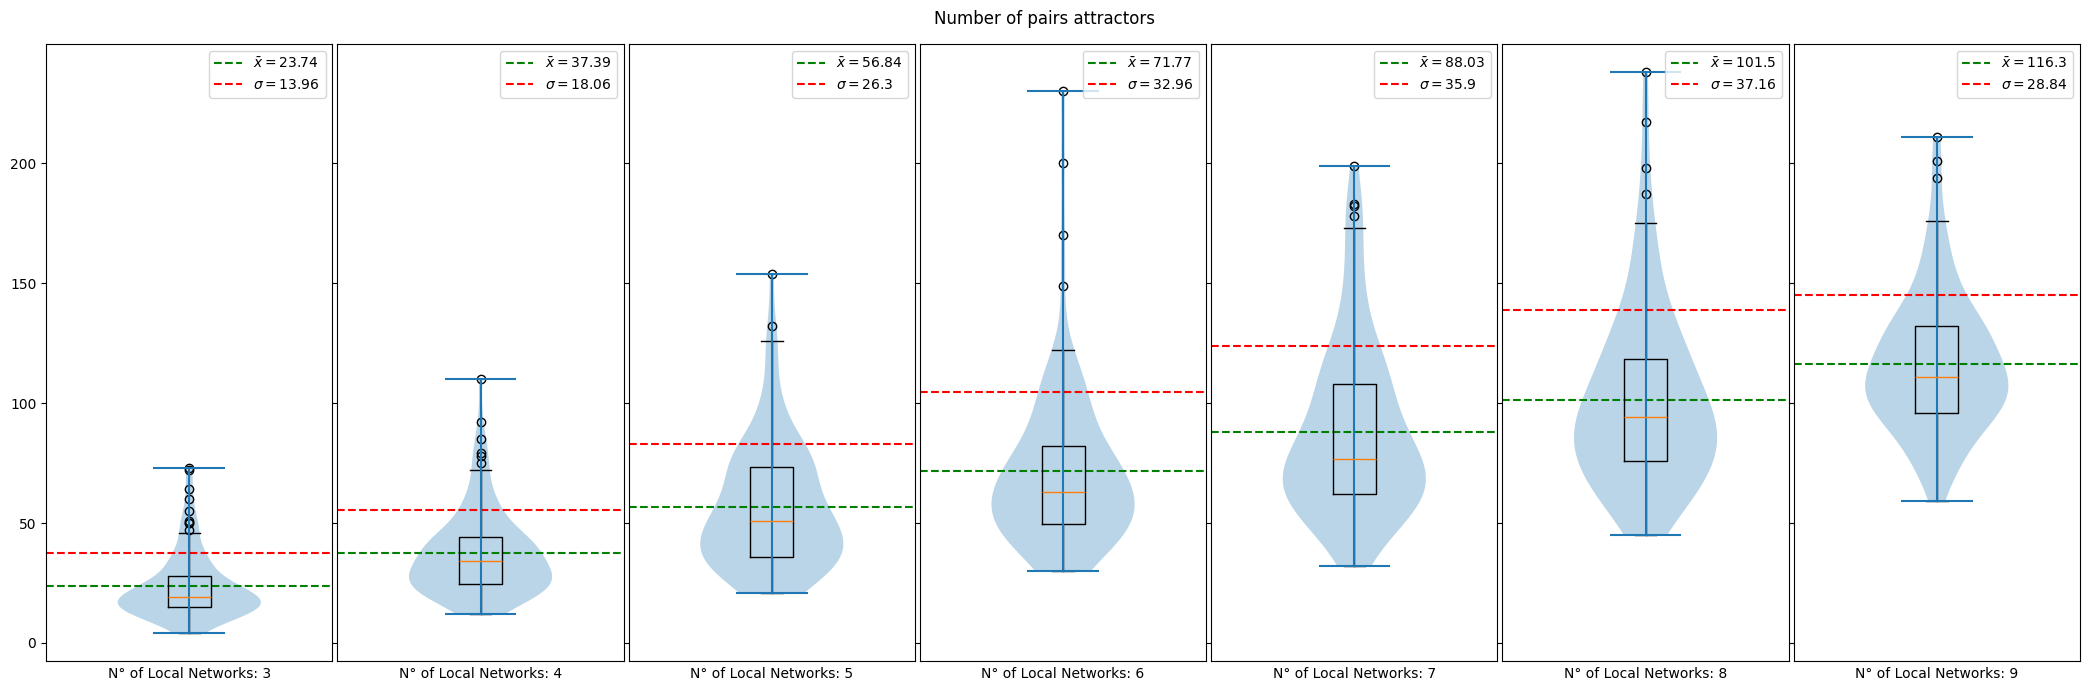

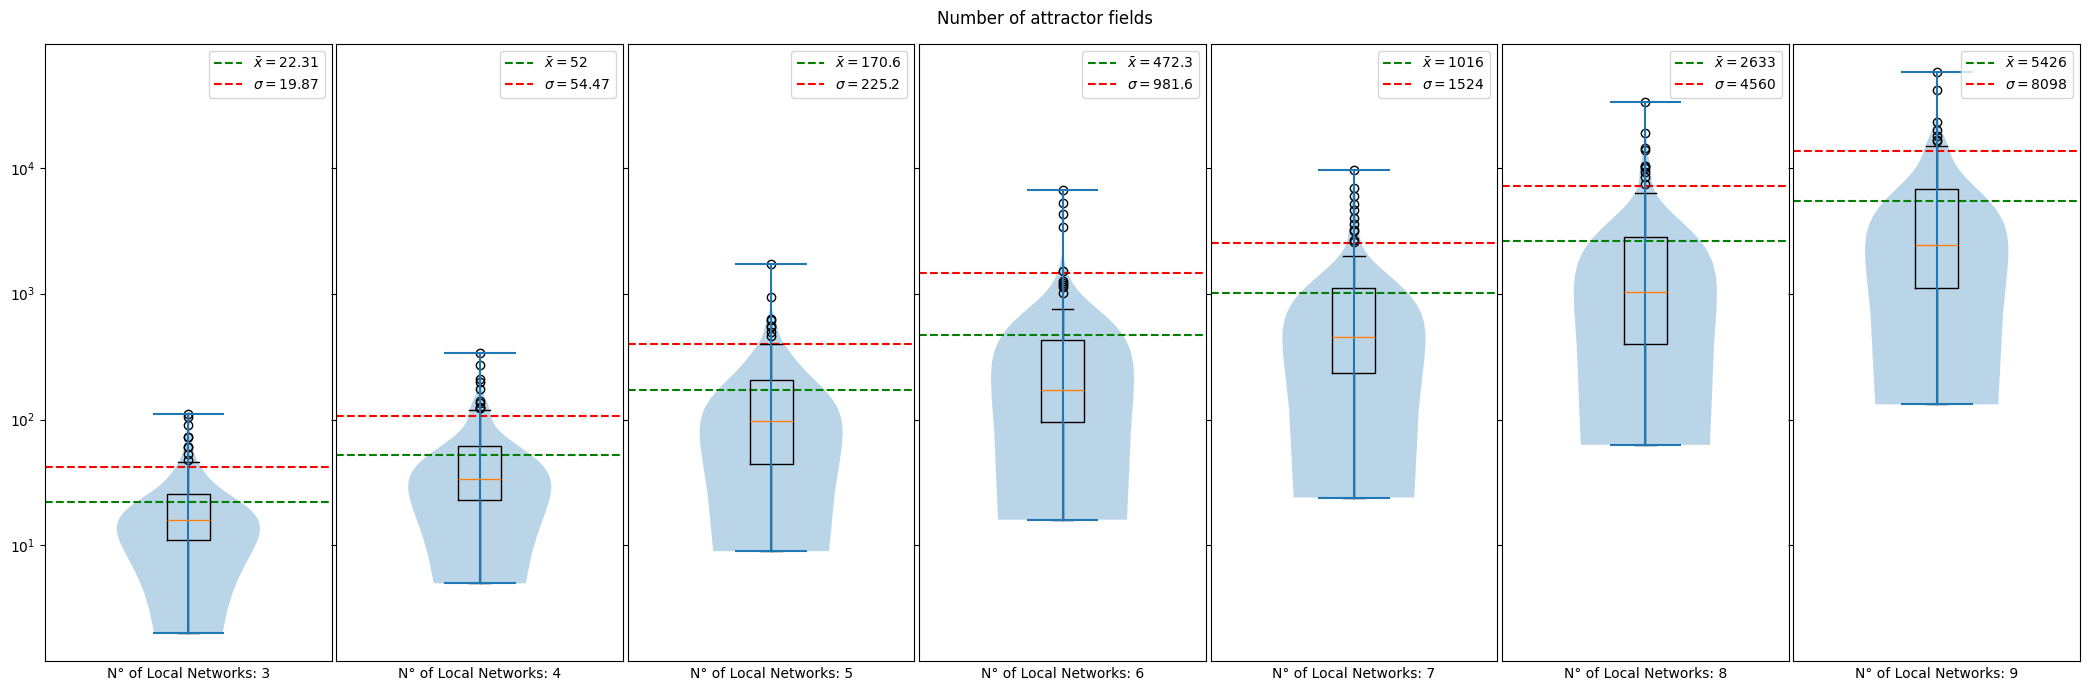

In [28]:
n_local_net = df['n_local_networks'].unique()
labels = {key:label for key, label in zip(df.keys()[-3:], [
          "Number of attractors",
          "Number of pairs attractors",
          "Number of attractor fields"])}
log_scale = {key:label for key, label in zip(df.keys()[-3:], [
          False,
          False,
          True])}
grouped = df.groupby("n_local_networks")

for key in df.keys()[-3:]:
    fig, axs = plt.subplots(1, n_local_net.size, figsize=(n_local_net.size * 3, 7), sharey=True)
    for ax, i_local_net in zip(axs, n_local_net):
        group = grouped.get_group(i_local_net)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Local Networks: {i_local_net}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)